# Phase 2 Project Notebook -- Jamie Dowat 

#### Project Goals:

* Develop at least 2 variables that are well-modeled with price.
* At least 3 polished visualizations, including a QQ plot

#### Column Definitions
* View:
* Condition
* Grade


## Data Understanding

In [349]:
import pandas as pd

In [179]:
df = pd.read_csv('../src/kc_house_data.csv')

In [180]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [182]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [351]:
df.corr().price.sort_values(ascending=False)

price             1.000000
sqft_living       0.704652
grade             0.667224
sqft_above        0.609168
sqft_living15     0.582167
price_per_sqft    0.554178
bathrooms         0.527350
view              0.395766
bedrooms          0.309651
lat               0.305126
waterfront        0.276295
floors            0.258277
yr_renovated      0.122590
sqft_lot          0.087005
sqft_lot15        0.081243
yr_built          0.053525
condition         0.038037
long              0.021390
year_sold         0.005435
month_sold       -0.010276
id               -0.017439
unincorporated   -0.033641
zipcode          -0.050212
Name: price, dtype: float64

### Engineering Variables

##### New Column : Price_per_sqft

In [185]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [186]:
df[df['price_per_sqft']==df['price_per_sqft'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
19321,6021500970,4/7/2015,874950.0,2,1.0,1080,4000,1.0,0.0,0.0,...,1080,?,1940,NaN,98117,47.6902,-122.387,1530,4240,810.138889


In [187]:
df[df['price_per_sqft']==df['price_per_sqft'].min()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
18248,2891000610,12/11/2014,148900.0,4,1.75,1700,6000,1.0,0.0,0.0,...,1700,0.0,1967,0.0,98002,47.3252,-122.208,1280,6000,87.588235


###### New Column : Month Sold

In [188]:
df.date.dtype

dtype('O')

In [189]:
df['month_sold'] = df['date'].map(lambda x: int(x.split('/')[0]))

In [190]:
df['month_sold'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month_sold, dtype: int64

##### New Column: Year Sold

In [352]:
df['year_sold'] = df['date'].map(lambda x: int(x.split('/')[2]))
df.year_sold.value_counts()

2014    13030
2015     6191
Name: year_sold, dtype: int64

###### New Column: incorporated vs not incorporated

In [191]:
unincorporated_zipcodes = [98019, 98014, 98024, 98065, 98038, 98051, 98022, 98045, 98288, 98224,98051, 98027, 98029, 98014, 98077, 98053, 98010, 98027, 98070]
df['unincorporated'] = np.where(df['zipcode'].isin(unincorporated_zipcodes), 1, 0)

In [192]:
df['unincorporated'].value_counts()

0    18302
1     3295
Name: unincorporated, dtype: int64

In [193]:
df_grade_mean = df.groupby('grade').mean()

In [194]:
df_grade_count = df.groupby('grade').count()

In [195]:
df.groupby('grade').boxplot

<bound method boxplot_frame_groupby of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f9b62c26d30>>

In [196]:
df.groupby('grade')['price'].agg([np.mean,np.median])

,mean,median
grade,,
3,2.620000e+05,262000.0
4,2.120019e+05,200000.0
5,2.485240e+05,228700.0
6,3.019166e+05,275276.5
7,4.025946e+05,375000.0
8,5.429868e+05,510000.0
9,7.737382e+05,720000.0
10,1.072347e+06,914327.0
11,1.497792e+06,1280000.0


In [197]:
grade_mean_median = df.groupby('grade')['price_per_sqft'].agg([np.mean,np.median])

In [198]:
df.groupby('grade')['price_per_sqft'].mean().values

array([503.84615385, 342.0123655 , 278.93360926, 270.98989171,
       251.88401441, 258.13953459, 275.83939347, 307.74632471,
       342.47894699, 403.60211783, 483.79669319])

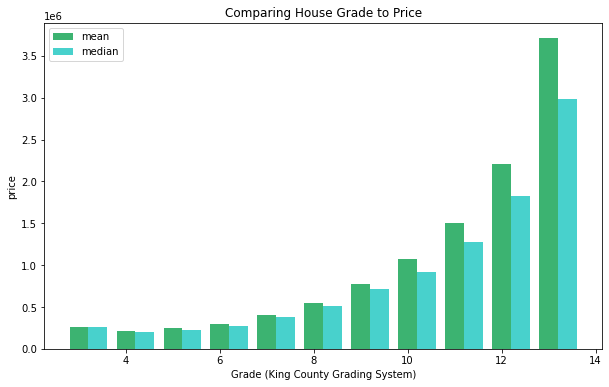

In [203]:
fig, ax = plt.subplots(figsize=(10,6))

grade_means = df.groupby('grade')['price'].mean().values
grade_medians = df.groupby('grade')['price'].median().values

w = 0.4
bar1 = [i for i in range(3,14)]
bar2 = [i+w for i in bar1]

ax.bar(bar1, grade_means, width=w, color='mediumseagreen', label='mean', align='center')
ax.bar(bar2, grade_medians, width=w, color='mediumturquoise', label='median', align='center')

# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Grade (King County Grading System)')
ax.set_ylabel('price')
ax.set_title('Comparing House Grade to Price')
ax.legend()

<AxesSubplot:xlabel='price', ylabel='Count'>

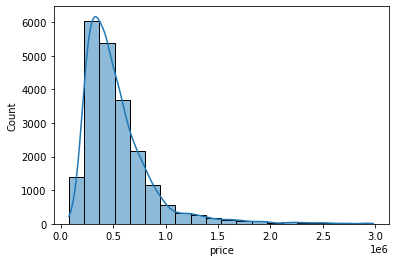

In [208]:
# Distribution of prices
sns.histplot(df['price'][df['price']<3000000], bins=20, kde=True)

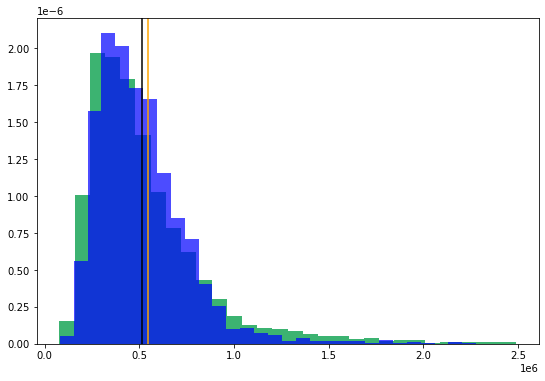

In [210]:
# comparing price distributions for uninc and inc areas
inc = df['price'][(df['unincorporated']==0)&(df['price']<2500000)]
uninc = df['price'][(df['unincorporated']==1)&(df['price']<2500000)]

fig, ax = plt.subplots(figsize=(9,6))

ax.hist(inc, bins=30, color='mediumseagreen', density=True) # inc
ax.hist(uninc, bins=30, color='blue', density=True, alpha=.7) # not inc

ax.axvline(x=df['price'][(df['unincorporated']==0)].mean(), color='orange') # incorporated
ax.axvline(x=df['price'][(df['unincorporated']==1)].mean(), color='black') # not inc

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

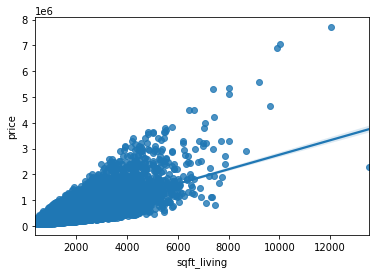

In [211]:
# Distribution of sqft_living and price
sns.regplot(x=df.sqft_living, y=df.price)

###### Waterfront views? 

In [221]:
df_wf = df
df_wf.dropna(inplace=True, subset=['waterfront'])

In [222]:
df_wf.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                57
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated      3412
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
price_per_sqft       0
month_sold           0
unincorporated       0
dtype: int64

In [223]:
df_wf.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [224]:
df_wf['price'][df_wf['waterfront']==1.0].mean()

1717214.7260273972

In [225]:
df_wf['price'][df_wf['waterfront']==0.0].mean()

532641.9866841416

Text(0.5, 1.0, 'Comparing dist of Price per Sqft')

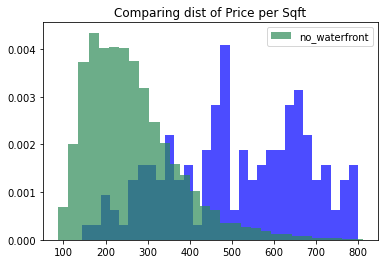

In [229]:
waterfront = df_wf['price_per_sqft'][df_wf['waterfront']==1]
no_waterfront = df_wf['price_per_sqft'][df_wf['waterfront']==0]
plt.hist(waterfront, bins=30, color='blue', density=True, alpha=.7)
plt.hist(no_waterfront, bins=30, color='seagreen', density=True, alpha=.7, label='no_waterfront')
plt.legend()
plt.title('Comparing dist of Price per Sqft')

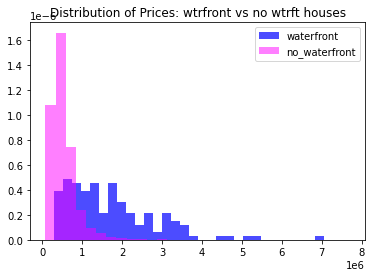

In [230]:
waterfront = df_wf['price'][df_wf['waterfront']==1]
no_waterfront = df_wf['price'][df_wf['waterfront']==0]
plt.hist(waterfront, bins=30, color='blue', density=True, alpha=.7, label='waterfront')
plt.hist(no_waterfront, bins=30, color='magenta', density=True, alpha=.5, label='no_waterfront')
plt.title('Distribution of Prices: wtrfront vs no wtrft houses')
plt.legend()